In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, roc_curve

def show_grid_results(grid_search, all=True):
    print('Best parameters:\n', grid_search.best_params_, '\n', grid_search.best_score_, '\n')
    if all:
        cvres = grid_search.cv_results_
        for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
            print(mean_score, params)

In [36]:
train = pd.read_csv('./data/cl_train.csv')
test = pd.read_csv('./data/cl_test.csv')
train.shape, test.shape

((520, 255), (281, 254))

In [3]:
Y = train['is_legendary']
X = train.drop(columns=['is_legendary', 'unique_id'])
Xt = test.drop(columns=['unique_id'])

In [4]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
Xt_scaled = scaler.transform(Xt)

### Collect the models score

In [5]:
l = ['a', 'b', 'c']
ix = l.index('c')
ix

2

In [6]:
def save_clf(obj: dict):
    name = type(obj['clf']).__name__
    global clfs_name, clfs, X_used, scores
    if name in clfs_name:
        ix = clfs_name.index(name)
        
        clfs_name.pop(ix)
        clfs.pop(ix)
        X_used.pop(ix)
        scores.pop(ix)
        
    clfs_name.append(name)
    clfs.append(obj['clf'])
    X_used.append(obj['X'])
    scores.append(obj['score'])

def reset_clfs():
    global clfs_name, clfs, X_used, scores
    clfs_name = []
    clfs = []
    X_used = []
    scores = []

reset_clfs()

# Logistic Classifier

In [7]:
from sklearn.linear_model import LogisticRegression
param_grid = [
#     { 'solver':['liblinear'] },
    { 'solver':['newton-cg'], 'penalty':['l2', 'none'], 'multi_class':['ovr', 'multinomial', 'auto'] },
#     { 'solver':['lbfgs'], 'penalty':['l2', 'none'], 'multi_class':['ovr', 'multinomial', 'auto'] },
#     { 'solver':['saga'], 'l1_ratio':[0.5, 0.6, 0.75, 0.9], 'max_iter':[1000], 'penalty':['l1', 'l2', 'elasticnet'] },
#     { 'solver':['sag'], 'penalty':['l2'], 'max_iter': [1000] }
]
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X_scaled, Y)
show_grid_results(grid_search)

Best parameters:
 {'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'} 
 0.6634615384615384 

0.6634615384615384 {'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
0.32859806859806856 {'multi_class': 'ovr', 'penalty': 'none', 'solver': 'newton-cg'}
0.6119505494505495 {'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
0.3321045621045621 {'multi_class': 'multinomial', 'penalty': 'none', 'solver': 'newton-cg'}
0.6634615384615384 {'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
0.32859806859806856 {'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [8]:
aux = {
    'X': X_scaled,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# RidgeClassifier

In [91]:
from sklearn.linear_model import RidgeClassifier
param_grid = [
    { 'alpha': [0.001, 0.1, ] }
]
model = RidgeClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X, Y)
show_grid_results(grid_search)

Best parameters:
 {'alpha': 0.001} 
 0.7363736263736264 

0.7363736263736264 {'alpha': 0.001}
0.7292307692307692 {'alpha': 0.1}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [92]:
aux = {
    'X': X,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# XGBClassifier

In [148]:
from xgboost import XGBClassifier
param_grid = [
    { 'n_estimators': [60, 70, 80], 'eta': [0.005, 0.01], 'gamma': [2, 3] }
]
model = XGBClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X, Y)
show_grid_results(grid_search)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters:
 {'eta': 0.005, 'gamma': 2, 'n_estimators': 60} 
 0.7626282051282052 

0.7626282051282052 {'eta': 0.005, 'gamma': 2, 'n_estimators': 60}
0.7626282051282052 {'eta': 0.005, 'gamma': 2, 'n_estimators': 70}
0.7459615384615385 {'eta': 0.005, 'gamma': 2, 'n_estimators': 80}
0.7523076923076922 {'eta': 0.005, 'gamma': 3, 'n_estimators': 60}
0.7523076923076922 {'eta': 0.005, 'gamma': 3, 'n_estimators': 70}
0.7523076923076922 {'eta': 0.005, 'gamma': 3, 'n_estimators': 80}
0.7626282051282052 {'eta': 0.01, 'gamma': 2, 'n_estimators': 60}
0.7626282051282052 {'eta': 0.01, 'gamma': 2, 'n_estimators': 70}
0.7459615384615385 {'eta': 0.01, 'gamma': 2, 'n_estimators': 80}
0.7523076923076922 {'eta': 0.01, 'gamma': 3, 'n_estimators': 60}
0.7523076923076922 {'eta': 0.01, 'gamma': 3, 'n_estimators': 70}
0.7523076923076922 {'eta': 0.01, 'gamma': 3, 'n_estimators': 80}


In [149]:
aux = {
    'X': X,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# RandomForestClassifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
param_grid = [
    { 'n_estimators': [100, 150, 200] }
]
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X, Y)
show_grid_results(grid_search)

Best parameters:
 {'n_estimators': 100} 
 0.9666666666666666 

0.9666666666666666 {'n_estimators': 100}
0.9 {'n_estimators': 150}
0.9666666666666666 {'n_estimators': 200}


In [10]:
aux = {
    'X': X,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# Neural Network

In [37]:
X.shape

(520, 253)

In [54]:
from sklearn.neural_network import MLPClassifier
param_grid = [
    { 'activation': ['relu'], 'hidden_layer_sizes': [(60), (70), (80)], 'max_iter': [1000],
      'learning_rate_init': [0.0005, 0.001, 0.002]
    }
]
model = MLPClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X_scaled, Y)
show_grid_results(grid_search)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters:
 {'activation': 'relu', 'hidden_layer_sizes': 60, 'learning_rate_init': 0.001, 'max_iter': 1000} 
 0.5059188034188035 

0.4696001221001221 {'activation': 'relu', 'hidden_layer_sizes': 60, 'learning_rate_init': 0.0005, 'max_iter': 1000}
0.5059188034188035 {'activation': 'relu', 'hidden_layer_sizes': 60, 'learning_rate_init': 0.001, 'max_iter': 1000}
0.4753815628815629 {'activation': 'relu', 'hidden_layer_sizes': 60, 'learning_rate_init': 0.002, 'max_iter': 1000}
0.5015488677988678 {'activation': 'relu', 'hidden_layer_sizes': 70, 'learning_rate_init': 0.0005, 'max_iter': 1000}
0.4703632478632479 {'activation': 'relu', 'hidden_layer_sizes': 70, 'learning_rate_init': 0.001, 'max_iter': 1000}
0.4580400155400155 {'activation': 'relu', 'hidden_layer_sizes': 70, 'learning_rate_init': 0.002, 'max_iter': 1000}
0.48645271395271394 {'activation': 'relu', 'hidden_layer_sizes': 80, 'learning_rate_init': 0.0005, 'max_iter': 1000}
0.46544261294261297 {'activation': 'relu', 'hidden_lay

In [55]:
from sklearn.neural_network import MLPClassifier
param_grid = [
#     { 'activation': ['relu'], 'hidden_layer_sizes': [(10), (25), (50)], 'max_iter': [1000]  },
    { 'activation': ['tanh'], 'hidden_layer_sizes': [(25), (50), (70)], 'max_iter': [1000],
      'learning_rate_init': [0.0005, 0.0004, 0.0003]
    }
]
model = MLPClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X, Y)
show_grid_results(grid_search)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Co

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Co

Best parameters:
 {'activation': 'tanh', 'hidden_layer_sizes': 70, 'learning_rate_init': 0.0003, 'max_iter': 1000} 
 0.7415064102564102 

0.7330128205128205 {'activation': 'tanh', 'hidden_layer_sizes': 25, 'learning_rate_init': 0.0005, 'max_iter': 1000}
0.5852564102564102 {'activation': 'tanh', 'hidden_layer_sizes': 25, 'learning_rate_init': 0.0004, 'max_iter': 1000}
0.6310897435897436 {'activation': 'tanh', 'hidden_layer_sizes': 25, 'learning_rate_init': 0.0003, 'max_iter': 1000}
0.696025641025641 {'activation': 'tanh', 'hidden_layer_sizes': 50, 'learning_rate_init': 0.0005, 'max_iter': 1000}
0.5925320512820513 {'activation': 'tanh', 'hidden_layer_sizes': 50, 'learning_rate_init': 0.0004, 'max_iter': 1000}
0.6671474358974359 {'activation': 'tanh', 'hidden_layer_sizes': 50, 'learning_rate_init': 0.0003, 'max_iter': 1000}
0.741025641025641 {'activation': 'tanh', 'hidden_layer_sizes': 70, 'learning_rate_init': 0.0005, 'max_iter': 1000}
0.6596153846153846 {'activation': 'tanh', 'hidden_la

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [56]:
grid_search.best_estimator_

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=70, learning_rate='constant',
              learning_rate_init=0.0003, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [57]:
aux = {
    'X': X,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# KNeighborsClassifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = [
    { 'n_neighbors': [5, 8, 10], 'algorithm': ['auto'] }
#     'ball_tree', 'kd_tree', 'brute'
]
model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X_scaled, Y)
show_grid_results(grid_search)

Best parameters:
 {'algorithm': 'auto', 'n_neighbors': 5} 
 0.6740384615384616 

0.6740384615384616 {'algorithm': 'auto', 'n_neighbors': 5}
0.55 {'algorithm': 'auto', 'n_neighbors': 8}
0.45 {'algorithm': 'auto', 'n_neighbors': 10}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [62]:
aux = {
    'X': X_scaled,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# SVC

In [63]:
from sklearn.svm import SVC
param_grid = [
    { 'kernel': ['linear'], 'probability': [True] }, # .9269
#     { 'kernel': ['rbf'], 'gamma': [0.5, 1], 'C': [0.01, 0.05] } # .90769
    { 'kernel': ['poly'], 'gamma': [1], 'probability': [True] }, # lot of time
    { 'kernel': ['sigmoid'], 'gamma': [1], 'C': [0.025], 'probability': [True] } # .90769
]
model = SVC()
grid_search = GridSearchCV(model, param_grid, cv=2, scoring='precision', return_train_score=True)
grid_search.fit(X_scaled, Y)
show_grid_results(grid_search)

Best parameters:
 {'gamma': 1, 'kernel': 'poly', 'probability': True} 
 0.636029411764706 

0.4954545454545454 {'kernel': 'linear', 'probability': True}
0.636029411764706 {'gamma': 1, 'kernel': 'poly', 'probability': True}
0.0 {'C': 0.025, 'gamma': 1, 'kernel': 'sigmoid', 'probability': True}


In [64]:
aux = {
    'X': X_scaled,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# AdaBoostClassifier

In [69]:
from sklearn.ensemble import AdaBoostClassifier
param_grid = [
    { 'n_estimators': [48, 50, 51], 'algorithm': ['SAMME', 'SAMME.R'] }
]
model = AdaBoostClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X, Y)
show_grid_results(grid_search)

Best parameters:
 {'algorithm': 'SAMME', 'n_estimators': 50} 
 0.6825961538461537 

0.6725961538461538 {'algorithm': 'SAMME', 'n_estimators': 48}
0.6825961538461537 {'algorithm': 'SAMME', 'n_estimators': 50}
0.6555769230769231 {'algorithm': 'SAMME', 'n_estimators': 51}
0.6657051282051282 {'algorithm': 'SAMME.R', 'n_estimators': 48}
0.6590384615384615 {'algorithm': 'SAMME.R', 'n_estimators': 50}
0.6590384615384615 {'algorithm': 'SAMME.R', 'n_estimators': 51}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [70]:
aux = {
    'X': X,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# GaussianNB

In [71]:
from sklearn.naive_bayes import GaussianNB
param_grid = [
    { 'var_smoothing': [0.01, 0.1, 0.15] }
]
model = GaussianNB()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X, Y)
show_grid_results(grid_search)

Best parameters:
 {'var_smoothing': 0.1} 
 0.5836538461538462 

0.5364468864468863 {'var_smoothing': 0.01}
0.5836538461538462 {'var_smoothing': 0.1}
0.5836538461538462 {'var_smoothing': 0.15}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:
aux = {
    'X': X,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# Linear Classifier

In [73]:
from sklearn.linear_model import SGDClassifier
param_grid = [
    { 'penalty': ['l1', 'l2', 'elasticnet'], 'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'] }
]
model = SGDClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X, Y)
show_grid_results(grid_search)

Best parameters:
 {'loss': 'log', 'penalty': 'l2'} 
 0.3689310689310689 

0.14665750915750916 {'loss': 'hinge', 'penalty': 'l1'}
0.05397435897435897 {'loss': 'hinge', 'penalty': 'l2'}
0.2043262946204123 {'loss': 'hinge', 'penalty': 'elasticnet'}
0.19068223443223442 {'loss': 'log', 'penalty': 'l1'}
0.3689310689310689 {'loss': 'log', 'penalty': 'l2'}
0.07631710055817198 {'loss': 'log', 'penalty': 'elasticnet'}
0.1843331084120558 {'loss': 'modified_huber', 'penalty': 'l1'}
0.13153860206289875 {'loss': 'modified_huber', 'penalty': 'l2'}
0.16078405721262864 {'loss': 'modified_huber', 'penalty': 'elasticnet'}
0.1006155051844707 {'loss': 'squared_hinge', 'penalty': 'l1'}
0.16580446727185857 {'loss': 'squared_hinge', 'penalty': 'l2'}
0.1965659340659341 {'loss': 'squared_hinge', 'penalty': 'elasticnet'}
0.2551997614788312 {'loss': 'perceptron', 'penalty': 'l1'}
0.2508172384644533 {'loss': 'perceptron', 'penalty': 'l2'}
0.2587271062271062 {'loss': 'perceptron', 'penalty': 'elasticnet'}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [74]:
aux = {
    'X': X,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# ROC Curve

In [93]:
clfs_name

['LogisticRegression',
 'RandomForestClassifier',
 'MLPClassifier',
 'KNeighborsClassifier',
 'SVC',
 'AdaBoostClassifier',
 'GaussianNB',
 'SGDClassifier',
 'RidgeClassifier']

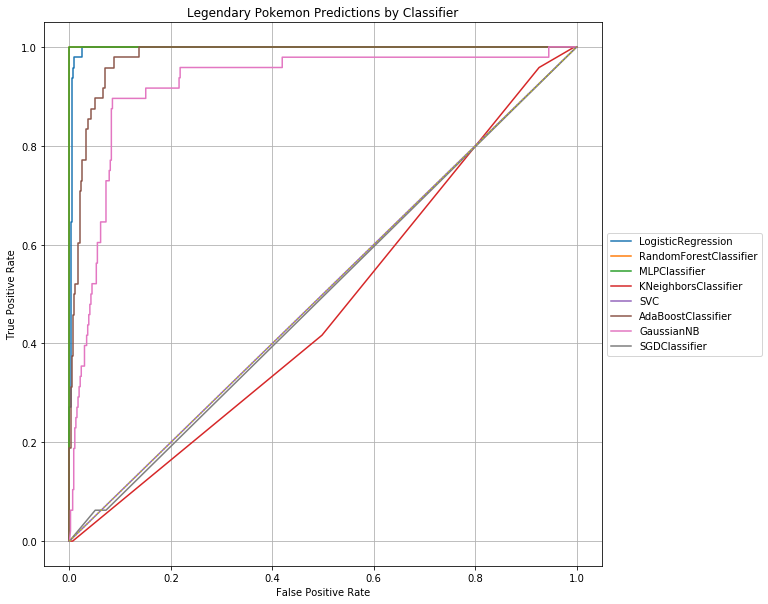

In [98]:
skip = ['RidgeClassifier']
# skip = []
accs_scores = []
roc_score = []
for ix in range(len(clfs_name)):
    this_x = X_used[ix]
    this_model = clfs[ix]
    model_name = clfs_name[ix]
    model_prediction = this_model.predict(this_x)
    acc = accuracy_score(Y, model_prediction)
    prec = precision_score(Y, model_prediction)
    roc_score.append(prec)
    accs_scores.append(acc)
    if model_name in skip: continue
#     temp_acc = temp_acc.append({'Feature':feature_name, 'Accuracy':acc}, ignore_index=True)
    SY = this_model.predict_proba(this_x)[:,1] # second column = probability
#     print(model_name)
    SFPR, STPR, STHRESH = roc_curve(Y, SY)
    plt.plot(SFPR, STPR, label=model_name)
    
plt.plot([0,1],[0,1], label='', ls='dotted')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Legendary Pokemon Predictions by Classifier")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.gcf().set_size_inches(10,10);
# print('Feature\t      Accuracy')
# temp_acc.sort_values(by='Accuracy', ascending=False)


<img src='https://cdn-images-1.medium.com/max/1200/1*uR09zTlPgIj5PvMYJZScVg.png' style='width:600px;'>

In [141]:
from sklearn.metrics import confusion_matrix
best_model = clfs[1]
Ypredicted = best_model.predict(X)
confusion_matrix(Y, Ypredicted)

array([[472,   0],
       [  0,  48]])

In [150]:
accdf = pd.DataFrame(columns=['Classifier', 'Precision'])
accdf['Classifier'] = clfs_name
accdf['Precision'] = scores
# accdf['Accuracy'] = accs_scores
# accdf['Precision on Whole Data'] = roc_score
accdf.sort_values('Precision', ascending=False, inplace=True)
accdf

,Classifier,Precision
1,RandomForestClassifier,0.966667
9,XGBClassifier,0.762628
2,MLPClassifier,0.741506
8,RidgeClassifier,0.736374
5,AdaBoostClassifier,0.682596
3,KNeighborsClassifier,0.674038
0,LogisticRegression,0.663462
4,SVC,0.636029
6,GaussianNB,0.583654
7,SGDClassifier,0.368931


In [151]:
def plot_horizontal_hist(xplot, yplot, xlabel, title):
    fig, ax = plt.subplots(figsize=(20,10))
    ax = sns.barplot(x=xplot, y=yplot, palette=sns.light_palette("yellow", n_colors=len(xplot), reverse=True))
    # plt.ylabel("")
    plt.xlabel(xlabel, fontsize=20)
    plt.title(title, fontsize=25)
    plt.gcf().set_size_inches(8,8)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height()/1.4, "%.2f" % width, ha="center", fontsize=15)
    sns.despine()
    plt.plot();

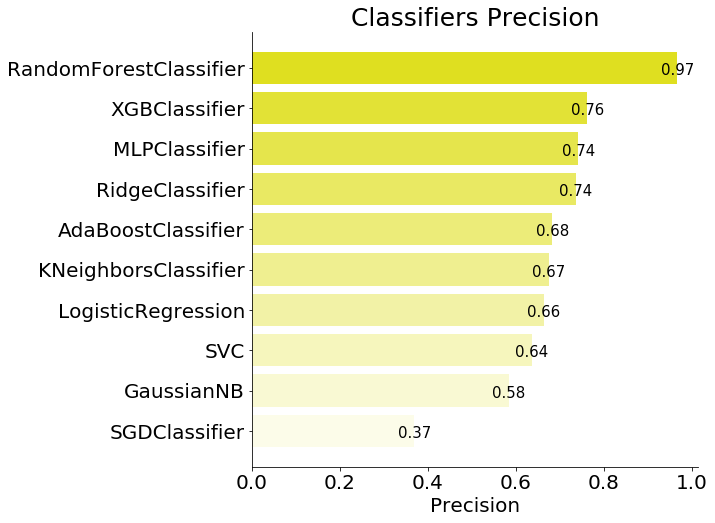

In [152]:
plot_horizontal_hist(list(accdf['Precision']), list(accdf['Classifier']), 'Precision', 'Classifiers Precision')

# Predict the test set

In [78]:
best_model = clfs[1]
Yt = best_model.predict(Xt)

In [79]:
output = pd.DataFrame()
output['unique_id'] = test['unique_id']
output['is_legendary'] = Yt.astype(int)
output.head()

,unique_id,is_legendary
0,602,0
1,756,0
2,191,0
3,16,0
4,718,0


In [80]:
output[ output['is_legendary']==1 ]

,unique_id,is_legendary
77,254,1
134,375,1
172,231,1
197,791,1
244,668,1
253,197,1
264,321,1
275,463,1


In [81]:
import datetime
tnow = datetime.datetime.now()
_result_file = 'results/result_'+tnow.strftime("%b-%d %H %M %S")+'.csv'
output.to_csv(_result_file, index=False)